<a href="https://colab.research.google.com/github/ViniciusCastillo/Teste_Einstein/blob/main/%20notebooks/draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format

In [20]:
df = pd.read_csv('https://github.com/ViniciusCastillo/Teste_Einstein/raw/main/datasets/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   target  10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 312.6+ KB


In [4]:
df.describe(include='all')

x1        x2        x3 target
count  10,000.00 10,000.00 10,000.00  10000
unique       NaN       NaN       NaN      3
top          NaN       NaN       NaN    low
freq         NaN       NaN       NaN   6000
mean       42.67      9.02    -24.60    NaN
std        25.60      5.18     20.14    NaN
min       -19.50      0.17    -59.98    NaN
25%        21.68      5.26    -41.92    NaN
50%        42.94      8.07    -24.55    NaN
75%        64.13     11.73     -7.08    NaN
max       101.52     43.08      9.99    NaN

In [5]:
df.target.value_counts()

low     6000
high    3000
med     1000
Name: target, dtype: int64

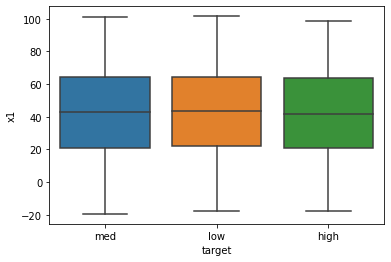

In [7]:
sns.boxplot(y=df['x1'], x=df['target'])

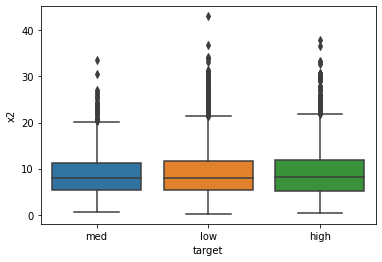

In [8]:
sns.boxplot(y=df['x2'], x=df['target'])

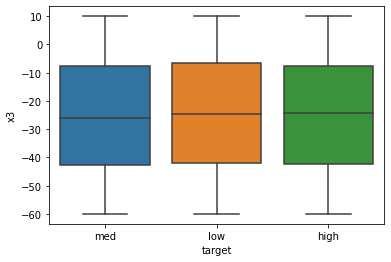

In [9]:
sns.boxplot(y=df['x3'], x=df['target'])

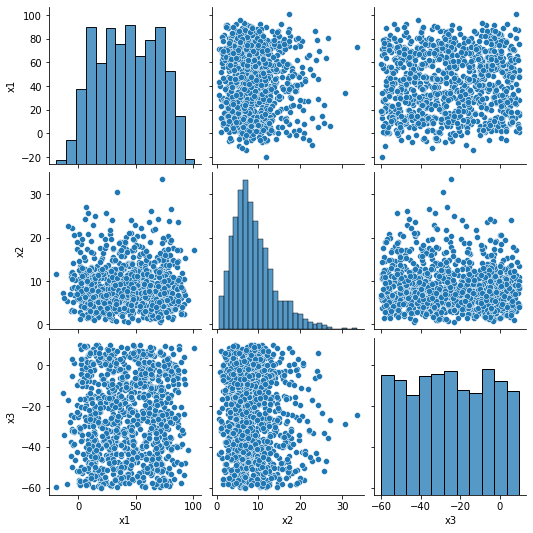

In [10]:
sns.pairplot(df.query('target == "med"'))

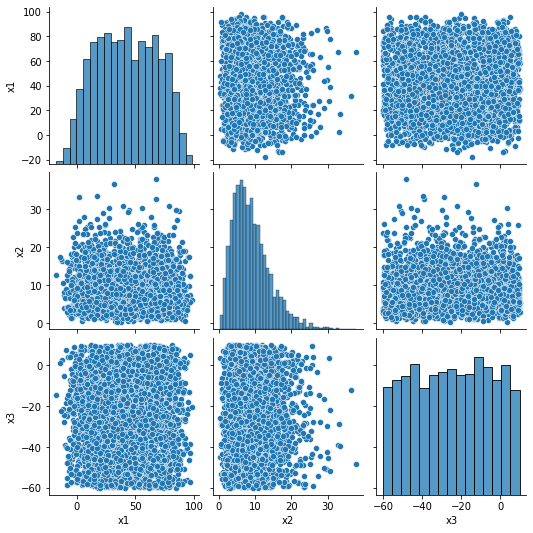

In [11]:
sns.pairplot(df.query('target == "high"'))

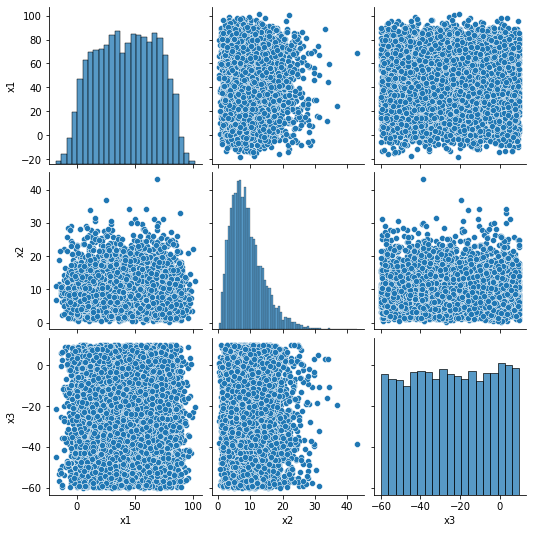

In [12]:
sns.pairplot(df.query('target == "low"'))

In [26]:
df['x13'] = df['x1']/df['x3']
df['x23'] = df['x2']/df['x3']
df['x12'] = df['x1']/df['x2']
df['x1^2'] = df['x1']**2
df['x2^2'] = df['x2']**2
df['x3^2'] = df['x3']**2
df['log(x1-min(x1)+1)'] = (df['x1']-df['x1'].min()+1).transform(np.log)
df['log(x2-min(x2)+1)'] = (df['x2']-df['x2'].min()+1).transform(np.log)
df['log(x3-min(x3)+1)'] = (df['x3']-df['x3'].min()+1).transform(np.log)
df['log(x1^2+1)'] = (df['x1^2']+1).transform(np.log)
df['log(x2^2+1)'] = (df['x2^2']+1).transform(np.log)
df['log(x3^2+1)'] = (df['x3^2']+1).transform(np.log)
df['target_low'] = 0
df.loc[df['target']=="low", 'target_low'] = 1
df['target_high'] = 0
df.loc[df['target']=="high", 'target_high'] = 1
df.corr()

x1    x2    x3   x13   x23   x12  x1^2  x2^2  x3^2  \
x1                 1.00 -0.01 -0.01 -0.00  0.00  0.43  0.96 -0.01  0.01   
x2                -0.01  1.00  0.00  0.02  0.04 -0.42 -0.01  0.95 -0.00   
x3                -0.01  0.00  1.00  0.01  0.02 -0.00 -0.01 -0.01 -0.94   
x13               -0.00  0.02  0.01  1.00  0.73 -0.00 -0.00  0.02 -0.00   
x23                0.00  0.04  0.02  0.73  1.00 -0.01  0.00  0.04 -0.01   
x12                0.43 -0.42 -0.00 -0.00 -0.01  1.00  0.42 -0.30 -0.00   
x1^2               0.96 -0.01 -0.01 -0.00  0.00  0.42  1.00 -0.00  0.01   
x2^2              -0.01  0.95 -0.01  0.02  0.04 -0.30 -0.00  1.00  0.00   
x3^2               0.01 -0.00 -0.94 -0.00 -0.01 -0.00  0.01  0.00  1.00   
log(x1-min(x1)+1)  0.96 -0.02 -0.01 -0.00  0.01  0.41  0.85 -0.02  0.01   
log(x2-min(x2)+1) -0.02  0.94  0.01  0.01  0.03 -0.56 -0.01  0.79 -0.01   
log(x3-min(x3)+1) -0.01  0.00  0.91  0.00  0.01  0.00 -0.01 -0.00 -0.98   
log(x1^2+1)        0.90 -0.01 -0.01 -0.00  0.01  0.38  0.77 -0.01  0.01   
log(x2^2+1)       -0.02  0.93  0.01  0.01  0.03 -0.56 -0.01  0.78 -0.01   
log(x3^2+1)        0.01 -0.01 -0.90 -0.01 -0.03 -0.00  0.01 -0.00  0.79   
target_low         0.01  0.00  0.01  0.01 -0.00  0.01  0.01  0.00 -0.00   
target_high       -0.01  0.01 -0.00 -0.01 -0.01 -0.01 -0.01  0.01 -0.01   

                   log(x1-min(x1)+1)  log(x2-min(x2)+1)  log(x3-min(x3)+1)  \
x1                              0.96              -0.02              -0.01   
x2                             -0.02               0.94               0.00   
x3                             -0.01               0.01               0.91   
x13                            -0.00               0.01               0.00   
x23                             0.01               0.03               0.01   
x12                             0.41              -0.56               0.00   
x1^2                            0.85              -0.01              -0.01   
x2^2                           -0.02               0.79              -0.00   
x3^2                            0.01              -0.01              -0.98   
log(x1-min(x1)+1)               1.00              -0.02              -0.00   
log(x2-min(x2)+1)              -0.02               1.00               0.01   
log(x3-min(x3)+1)              -0.00               0.01               1.00   
log(x1^2+1)                     0.94              -0.01              -0.01   
log(x2^2+1)                    -0.02               1.00               0.01   
log(x3^2+1)                     0.01              -0.01              -0.76   
target_low                      0.01               0.00               0.00   
target_high                    -0.01               0.01               0.01   

                   log(x1^2+1)  log(x2^2+1)  log(x3^2+1)  target_low  \
x1                        0.90        -0.02         0.01        0.01   
x2                       -0.01         0.93        -0.01        0.00   
x3                       -0.01         0.01        -0.90        0.01   
x13                      -0.00         0.01        -0.01        0.01   
x23                       0.01         0.03        -0.03       -0.00   
x12                       0.38        -0.56        -0.00        0.01   
x1^2                      0.77        -0.01         0.01        0.01   
x2^2                     -0.01         0.78        -0.00        0.00   
x3^2                      0.01        -0.01         0.79       -0.00   
log(x1-min(x1)+1)         0.94        -0.02         0.01        0.01   
log(x2-min(x2)+1)        -0.01         1.00        -0.01        0.00   
log(x3-min(x3)+1)        -0.01         0.01        -0.76        0.00   
log(x1^2+1)               1.00        -0.01         0.01        0.00   
log(x2^2+1)              -0.01         1.00        -0.01        0.00   
log(x3^2+1)               0.01        -0.01         1.00       -0.00   
target_low                0.00         0.00        -0.00        1.00   
target_high              -0.00         0.

In [22]:
df.describe()

x1        x2        x3       x13       x23       x12      x1^2  \
count 10,000.00 10,000.00 10,000.00 10,000.00 10,000.00 10,000.00 10,000.00   
mean      42.67      9.02    -24.60       inf       inf      7.23  2,475.88   
std       25.60      5.18     20.14       NaN       NaN     10.32  2,264.39   
min      -19.50      0.17    -59.98 -7,408.00   -635.00     -5.56      0.00   
25%       21.68      5.26    -41.92     -2.47     -0.52      2.34    469.81   
50%       42.94      8.07    -24.55     -1.20     -0.24      4.92  1,843.84   
75%       64.13     11.73     -7.08     -0.35     -0.11      8.85  4,113.30   
max      101.52     43.08      9.99       inf       inf    466.24 10,306.31   

           x2^2      x3^2  log(x1-min(x1)+1)  log(x2-min(x2)+1)  \
count 10,000.00 10,000.00          10,000.00          10,000.00   
mean     108.25  1,010.84               4.04               2.15   
std      130.17  1,065.01               0.49               0.55   
min        0.03      0.00               0.00               0.00   
25%       27.67     72.42               3.74               1.81   
50%       65.21    602.95               4.15               2.19   
75%      137.59  1,757.29               4.44               2.53   
max    1,855.89  3,597.60               4.80               3.78   

       log(x3-min(x3)+1)  log(x1^2+1)  log(x2^2+1)  log(x3^2+1)  target_low  \
count          10,000.00    10,000.00    10,000.00    10,000.00   10,000.00   
mean                3.34         6.94         4.09         5.72        0.60   
std                 0.85         1.87         1.19         2.13        0.49   
min                 0.00         0.00         0.03         0.00        0.00   
25%                 2.95         6.15         3.36         4.30        0.00   
50%                 3.60         7.52         4.19         6.40        1.00   
75%                 3.99         8.32         4.93         7.47        1.00   
max                 4.26         9.24         7.53         8.19        1.00   

       target_high  
count    10,000.00  
mean          0.30  
std           0.46  
min           0.00  
25%           0.00  
50%           0.00  
75%           1.00  
max           1.00

In [39]:
df.loc[df['x13'] == np.inf, 'x13'] = 0
df.loc[df['x23'] == np.inf, 'x23'] = 0
df.describe()

x1        x2        x3       x13       x23       x12      x1^2  \
count 10,000.00 10,000.00 10,000.00 10,000.00 10,000.00 10,000.00 10,000.00   
mean      42.67      9.02    -24.60     -0.87      0.16      7.23  2,475.88   
std       25.60      5.18     20.14    167.14     38.51     10.32  2,264.39   
min      -19.50      0.17    -59.98 -7,408.00   -635.00     -5.56      0.00   
25%       21.68      5.26    -41.92     -2.47     -0.52      2.34    469.81   
50%       42.94      8.07    -24.55     -1.20     -0.24      4.92  1,843.84   
75%       64.13     11.73     -7.08     -0.35     -0.11      8.85  4,113.30   
max      101.52     43.08      9.99  7,429.00  2,619.00    466.24 10,306.31   

           x2^2      x3^2  log(x1-min(x1)+1)  log(x2-min(x2)+1)  \
count 10,000.00 10,000.00          10,000.00          10,000.00   
mean     108.25  1,010.84               4.04               2.15   
std      130.17  1,065.01               0.49               0.55   
min        0.03      0.00               0.00               0.00   
25%       27.67     72.42               3.74               1.81   
50%       65.21    602.95               4.15               2.19   
75%      137.59  1,757.29               4.44               2.53   
max    1,855.89  3,597.60               4.80               3.78   

       log(x3-min(x3)+1)  log(x1^2+1)  log(x2^2+1)  log(x3^2+1)  target_low  \
count          10,000.00    10,000.00    10,000.00    10,000.00   10,000.00   
mean                3.34         6.94         4.09         5.72        0.60   
std                 0.85         1.87         1.19         2.13        0.49   
min                 0.00         0.00         0.03         0.00        0.00   
25%                 2.95         6.15         3.36         4.30        0.00   
50%                 3.60         7.52         4.19         6.40        1.00   
75%                 3.99         8.32         4.93         7.47        1.00   
max                 4.26         9.24         7.53         8.19        1.00   

       target_high  
count    10,000.00  
mean          0.30  
std           0.46  
min           0.00  
25%           0.00  
50%           0.00  
75%           1.00  
max           1.00

In [40]:
X = df[['x1','x2','x3','x13','x23','x12','x1^2','x2^2','x3^2','log(x1-min(x1)+1)','log(x2-min(x2)+1)','log(x3-min(x3)+1)','log(x1^2+1)','log(x2^2+1)','log(x3^2+1)']]
X = StandardScaler().fit_transform(X)
kmeans=KMeans(n_init=20)
df['cluster']=kmeans.fit_predict(X)

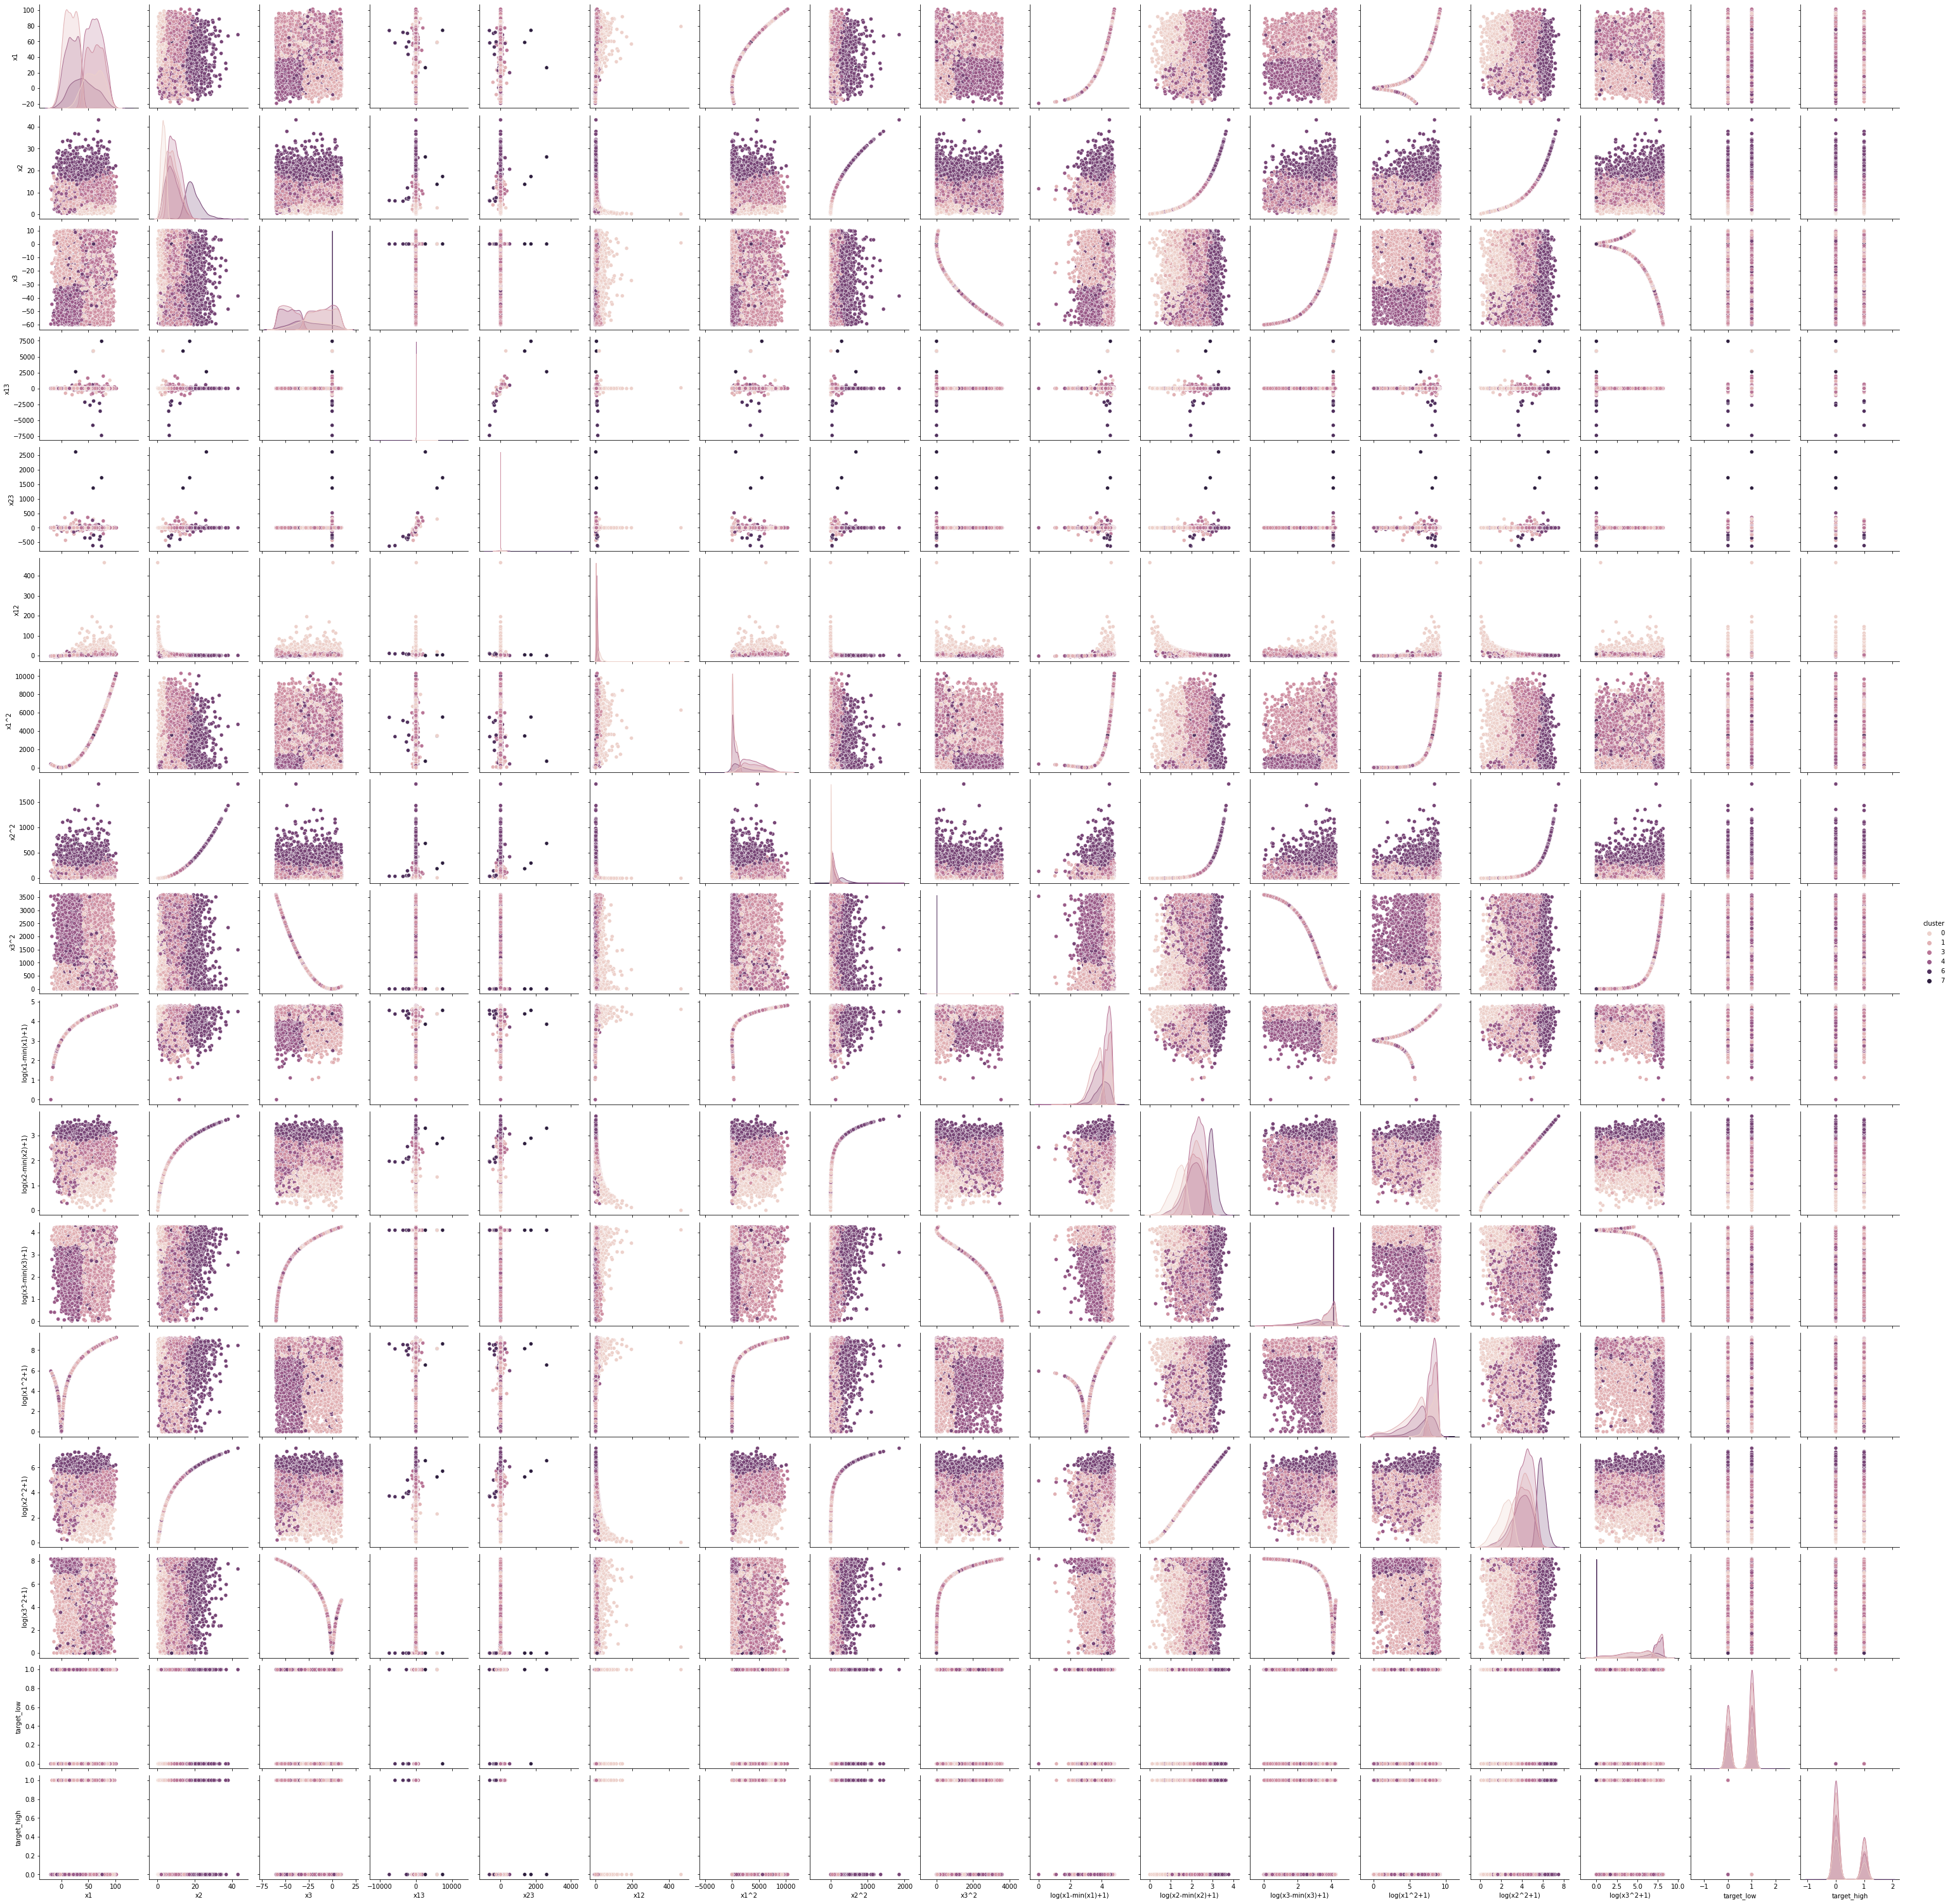

In [41]:
sns.pairplot(df, hue='cluster')

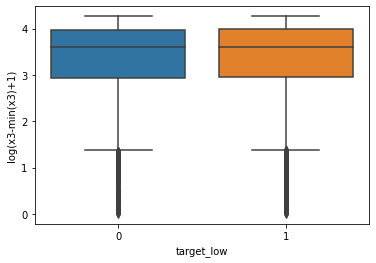

In [13]:
sns.boxplot(y=df['log(x3-min(x3)+1)'], x=df['target_low'])

In [109]:
df['bin_x3'] = pd.cut(df['x3'], bins=[df['x3'].min(),df['x3'].quantile(0.2),df['x3'].quantile(0.4),df['x3'].quantile(0.6),df['x3'].quantile(0.8),df['x3'].max()], labels=False)
df['bin_x2'] = pd.cut(df['x2'], bins=[df['x2'].min(),df['x2'].quantile(0.2),df['x2'].quantile(0.4),df['x2'].quantile(0.6),df['x2'].quantile(0.8),df['x2'].max()], labels=False)
df['bin_x1'] = pd.cut(df['x1'], bins=[df['x1'].min(),df['x1'].quantile(0.2),df['x1'].quantile(0.4),df['x1'].quantile(0.6),df['x1'].quantile(0.8),df['x1'].max()], labels=False)

In [110]:
df.pivot_table(index='bin_x1', columns='target', values='x1',aggfunc='count')

target  high   low  med
bin_x1                 
0.00     594  1202  203
1.00     628  1169  203
2.00     601  1205  194
3.00     596  1213  191
4.00     581  1211  208

In [111]:
df.pivot_table(index='bin_x2', columns='target', values='x1',aggfunc='count')

target  high   low  med
bin_x2                 
0.00     608  1196  197
1.00     591  1204  206
2.00     579  1205  213
3.00     617  1175  209
4.00     605  1219  175

In [112]:
df.pivot_table(index='bin_x3', columns='target', values='x1',aggfunc='count')

target  high   low  med
bin_x3                 
0.00     597  1189  212
1.00     584  1206  210
2.00     619  1192  190
3.00     632  1173  196
4.00     568  1239  191

In [113]:
df.corr()

x1    x2    x3  target_low  target_high   x13   x23  \
x1                 1.00 -0.01 -0.01        0.01        -0.01 -0.00  0.00   
x2                -0.01  1.00  0.00        0.00         0.01  0.02  0.04   
x3                -0.01  0.00  1.00        0.01        -0.00  0.01  0.02   
target_low         0.01  0.00  0.01        1.00        -0.80  0.01 -0.00   
target_high       -0.01  0.01 -0.00       -0.80         1.00 -0.01 -0.01   
x13               -0.00  0.02  0.01        0.01        -0.01  1.00  0.73   
x23                0.00  0.04  0.02       -0.00        -0.01  0.73  1.00   
log(x3-min(x3)+1) -0.01  0.00  0.91        0.00         0.01  0.00  0.01   
x12                0.43 -0.42 -0.00        0.01        -0.01 -0.00 -0.01   
log(x1-min(x1)+1)  0.96 -0.02 -0.01        0.01        -0.01 -0.00  0.01   
log(x2-min(x2)+1) -0.02  0.94  0.01        0.00         0.01  0.01  0.03   
bin_x3            -0.01  0.00  0.98        0.01        -0.00  0.01  0.02   
bin_x2            -0.01  0.90  0.01        0.00         0.00  0.02  0.02   
bin_x1             0.97 -0.01 -0.01        0.01        -0.01 -0.01  0.00   

                   log(x3-min(x3)+1)   x12  log(x1-min(x1)+1)  \
x1                             -0.01  0.43               0.96   
x2                              0.00 -0.42              -0.02   
x3                              0.91 -0.00              -0.01   
target_low                      0.00  0.01               0.01   
target_high                     0.01 -0.01              -0.01   
x13                             0.00 -0.00              -0.00   
x23                             0.01 -0.01               0.01   
log(x3-min(x3)+1)               1.00  0.00              -0.00   
x12                             0.00  1.00               0.41   
log(x1-min(x1)+1)              -0.00  0.41               1.00   
log(x2-min(x2)+1)               0.01 -0.56              -0.02   
bin_x3                          0.88 -0.00              -0.01   
bin_x2                          0.01 -0.48              -0.02   
bin_x1                         -0.01  0.42               0.92   

                   log(x2-min(x2)+1)  bin_x3  bin_x2  bin_x1  
x1                             -0.02   -0.01   -0.01    0.97  
x2                              0.94    0.00    0.90   -0.01  
x3                              0.01    0.98    0.01   -0.01  
target_low                      0.00    0.01    0.00    0.01  
target_high                     0.01   -0.00    0.00   -0.01  
x13                             0.01    0.01    0.02   -0.01  
x23                             0.03    0.02    0.02    0.00  
log(x3-min(x3)+1)               0.01    0.88    0.01   -0.01  
x12                            -0.56   -0.00   -0.48    0.42  
log(x1-min(x1)+1)              -0.02   -0.01   -0.02    0.92  
log(x2-min(x2)+1)               1.00    0.01    0.94   -0.01  
bin_x3                          0.01    1.00    0.02   -0.01  
bin_x2                          0.94    0.02    1.00   -0.01  
bin_x1                         -0.01   -0.01   -0.01    1.00

In [141]:
kmeans=KMeans(n_init=20)
df['cluster']=kmeans.fit_predict(df[['x1','x2','x3']])
df['cluster2']=kmeans.fit_predict(df[['x1','x2']])
df['cluster3']=kmeans.fit_predict(df[['log(x1-min(x1)+1)','log(x2-min(x2)+1)','log(x3-min(x3)+1)']])
df['cluster4']=kmeans.fit_predict(df[['log(x1-min(x1)+1)','log(x2-min(x2)+1)']])

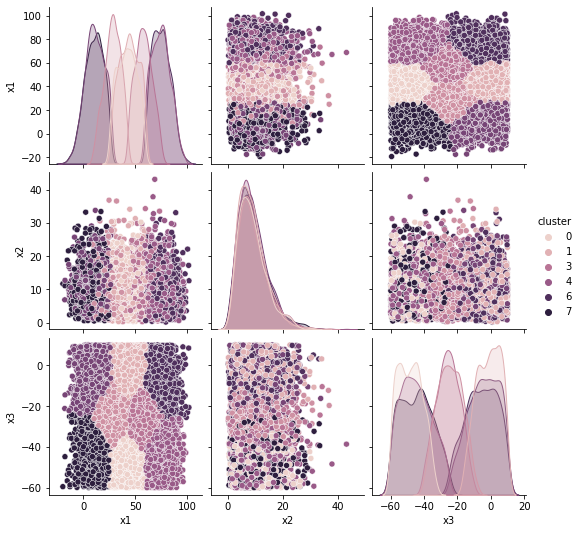

In [135]:
sns.pairplot(df[['x1','x2','x3','cluster']], hue='cluster')

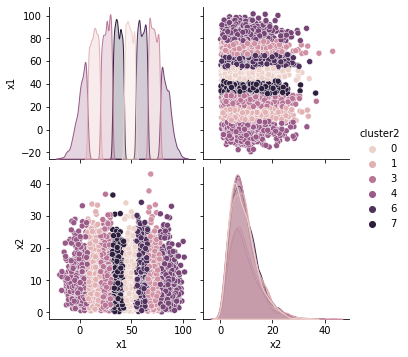

In [136]:
sns.pairplot(df[['x1','x2','cluster2']], hue='cluster2')

In [142]:
df.corr()

x1    x2    x3  target_low  target_high   x13   x23  \
x1                 1.00 -0.01 -0.01        0.01        -0.01 -0.00  0.00   
x2                -0.01  1.00  0.00        0.00         0.01  0.02  0.04   
x3                -0.01  0.00  1.00        0.01        -0.00  0.01  0.02   
target_low         0.01  0.00  0.01        1.00        -0.80  0.01 -0.00   
target_high       -0.01  0.01 -0.00       -0.80         1.00 -0.01 -0.01   
x13               -0.00  0.02  0.01        0.01        -0.01  1.00  0.73   
x23                0.00  0.04  0.02       -0.00        -0.01  0.73  1.00   
log(x3-min(x3)+1) -0.01  0.00  0.91        0.00         0.01  0.00  0.01   
x12                0.43 -0.42 -0.00        0.01        -0.01 -0.00 -0.01   
log(x1-min(x1)+1)  0.96 -0.02 -0.01        0.01        -0.01 -0.00  0.01   
log(x2-min(x2)+1) -0.02  0.94  0.01        0.00         0.01  0.01  0.03   
bin_x3            -0.01  0.00  0.98        0.01        -0.00  0.01  0.02   
bin_x2            -0.01  0.90  0.01        0.00         0.00  0.02  0.02   
bin_x1             0.97 -0.01 -0.01        0.01        -0.01 -0.01  0.00   
cluster           -0.44  0.00  0.11        0.00        -0.00  0.01  0.01   
cluster2          -0.06 -0.01  0.00       -0.00         0.00 -0.01 -0.02   
cluster3           0.33 -0.24  0.49       -0.00        -0.00 -0.01 -0.00   
cluster4          -0.33 -0.05 -0.00       -0.01        -0.00  0.02 -0.00   

                   log(x3-min(x3)+1)   x12  log(x1-min(x1)+1)  \
x1                             -0.01  0.43               0.96   
x2                              0.00 -0.42              -0.02   
x3                              0.91 -0.00              -0.01   
target_low                      0.00  0.01               0.01   
target_high                     0.01 -0.01              -0.01   
x13                             0.00 -0.00              -0.00   
x23                             0.01 -0.01               0.01   
log(x3-min(x3)+1)               1.00  0.00              -0.00   
x12                             0.00  1.00               0.41   
log(x1-min(x1)+1)              -0.00  0.41               1.00   
log(x2-min(x2)+1)               0.01 -0.56              -0.02   
bin_x3                          0.88 -0.00              -0.01   
bin_x2                          0.01 -0.48              -0.02   
bin_x1                         -0.01  0.42               0.92   
cluster                        -0.01 -0.18              -0.51   
cluster2                        0.00 -0.02              -0.05   
cluster3                        0.38  0.24               0.36   
cluster4                        0.01 -0.01              -0.31   

                   log(x2-min(x2)+1)  bin_x3  bin_x2  bin_x1  cluster  \
x1                             -0.02   -0.01   -0.01    0.97    -0.44   
x2                              0.94    0.00    0.90   -0.01     0.00   
x3                              0.01    0.98    0.01   -0.01     0.11   
target_low                      0.00    0.01    0.00    0.01     0.00   
target_high                     0.01   -0.00    0.00   -0.01    -0.00   
x13                             0.01    0.01    0.02   -0.01     0.01   
x23                             0.03    0.02    0.02    0.00     0.01   
log(x3-min(x3)+1)               0.01    0.88    0.01   -0.01    -0.01   
x12                            -0.56   -0.00   -0.48    0.42    -0.18   
log(x1-min(x1)+1)              -0.02   -0.01   -0.02    0.92    -0.51   
log(x2-min(x2)+1)               1.00    0.01    0.94   -0.01    -0.00   
bin_x3                          0.01    1.00    0.02   -0.01     0.11   
bin_x2                          0.94    0.02    1.00   -0.01    -0.00   
bin_x1                         -0.01   -0.01   -0.01    1.00    -0.43   
cluster                        -0.00    0.11   -0.00   -0.43     1.00   
cluster2                       -0.01    0.00   -0.01   -0.12     0.15   
cluster3                       -0.24    0.51   -0.25    0.33    -0.29   
cluster4                  

In [144]:
df.pivot_table(index='cluster4', columns='target', values='x1',aggfunc='count').T

cluster4     0    1     2    3    4    5    6    7
target                                            
high       503  365   583  242  391  219  208  489
low       1039  650  1243  448  759  498  436  927
med        158   88   212   78  131   92   75  166

k means precisa standarlizar antes 

ter um modelo de referencia (dumies)